In [2]:
# !pip install ultralytics

from ultralytics import YOLO

model = YOLO("weapon_detection_using_YOLOv8-1.pt")  # Change this to your actual model path


In [17]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

def predict_and_show(model, image_path, conf=0.25):
    # Check if image exists
    # if not os.path.exists(image_path):
    #     print(f"❌ Image not found: {image_path}")
    #     return

    # Load and show original image
    orig_img = cv2.imread(image_path)
    orig_img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    # Run prediction
    results = model.predict(image_path, conf=conf, save=False)

    # Extract rendered image with boxes
    rendered_img = results[0].plot()  # returns BGR with boxes

    # Convert to RGB for display
    rendered_img_rgb = cv2.cvtColor(rendered_img, cv2.COLOR_BGR2RGB)

    # Plot side-by-side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(orig_img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(rendered_img_rgb)
    plt.title("Predicted Output")
    plt.axis("off")

    plt.tight_layout()
    plt.show()



image 1/1 C:\Users\tvipi\project\Weapon-Detection-YOLO\try.jpg: 512x512 1 Tank, 142.5ms
Speed: 4.0ms preprocess, 142.5ms inference, 138.6ms postprocess per image at shape (1, 3, 512, 512)


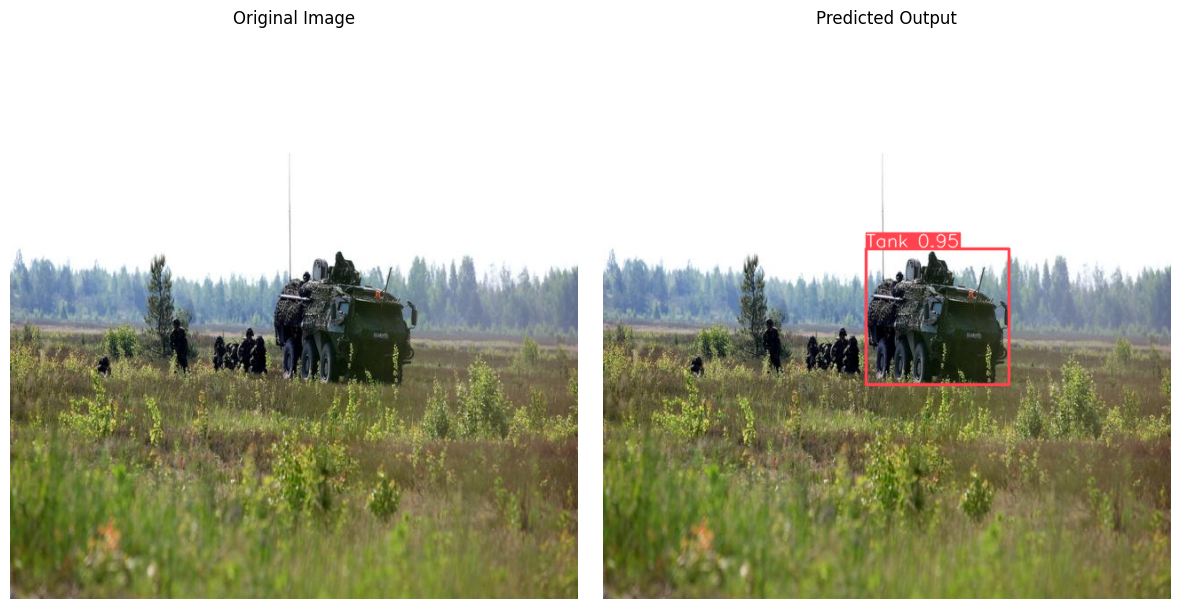

In [23]:
predict_and_show(model, "try.jpg")

In [4]:
import cv2

def detect_video(model, video_path, output_path='annotated_video.mp4', conf=0.25):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"❌ Cannot open video: {video_path}")
        return

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Use mp4v codec for .mp4 file compatibility
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    print("🚀 Processing video...")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model.predict(frame, conf=conf, verbose=False)
        annotated_frame = results[0].plot()
        out.write(annotated_frame)

    cap.release()
    out.release()
    print(f"✅ Saved annotated video as: {output_path}")


In [8]:
detect_video(model, "Weapon Detection video.mp4", output_path="result_weapon_detection.mp4")


🚀 Processing video...
✅ Saved annotated video as: result_weapon_detection.mp4
